In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
df = pd.read_csv('spam.csv')
df.head()

,Unnamed: 0,spamORham,Message
0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,ham,U dun say so early hor... U c already then say...
4,4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Data Cleaning

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5572 non-null   int64 
 1   spamORham   5572 non-null   object
 2   Message     5572 non-null   object
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [139]:
df.rename(columns= {'spamORham' : 'Spam', 'Message': 'Text'}, inplace=True)
df.head()

,Unnamed: 0,Spam,Text
0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,ham,U dun say so early hor... U c already then say...
4,4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [140]:
## Apply label encoding 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [141]:
df['Spam'] = encoder.fit_transform(df['Spam'])

In [142]:
df.head()

,Unnamed: 0,Spam,Text
0,0,0,"Go until jurong point, crazy.. Available only ..."
1,1,0,Ok lar... Joking wif u oni...
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,0,U dun say so early hor... U c already then say...
4,4,0,"Nah I don't think he goes to usf, he lives aro..."


In [143]:
df.shape

(5572, 3)

In [144]:
df.isnull().sum()

Unnamed: 0    0
Spam          0
Text          0
dtype: int64

In [145]:
df.duplicated().sum()

np.int64(0)

In [146]:
### Drop duplicate values
df = df.drop_duplicates(keep='first')

In [147]:
df.duplicated().sum()

np.int64(0)

In [148]:
df.shape

(5572, 3)

## EDA

In [149]:
df['Spam'].value_counts()

Spam
0    4825
1     747
Name: count, dtype: int64

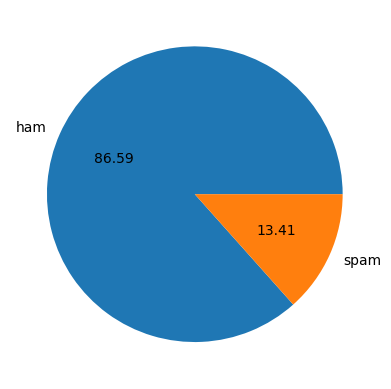

In [150]:
plt.pie(df['Spam'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [151]:
# Hence Data is Imbalanced

In [152]:
import nltk

In [153]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [154]:
# Count number of character
df['num_of_character'] = df['Text'].apply(len)

In [155]:
# count number of words
df['num_of_words'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [156]:
df['num_of_sent'] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)) )


In [157]:
df.describe()

,Unnamed: 0,Spam,num_of_character,num_of_words,num_of_sent
count,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000
mean,2785.500000,0.134063,80.118808,18.699390,1.996411
std,1608.642181,0.340751,59.690841,13.741932,1.520159
min,0.000000,0.000000,2.000000,1.000000,1.000000
25%,1392.750000,0.000000,36.000000,9.000000,1.000000
50%,2785.500000,0.000000,61.000000,15.000000,1.500000
75%,4178.250000,0.000000,121.000000,27.000000,2.000000
max,5571.000000,1.000000,910.000000,220.000000,38.000000


#### Describe Spam and ham 

In [158]:
# Spam
df[df['Spam'] == 1][['num_of_character', 'num_of_words', 'num_of_sent']].describe()

,num_of_character,num_of_words,num_of_sent
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [159]:
# Ham
df[df['Spam'] == 0][['num_of_character', 'num_of_words', 'num_of_sent']].describe()

,num_of_character,num_of_words,num_of_sent
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='num_of_character', ylabel='Count'>

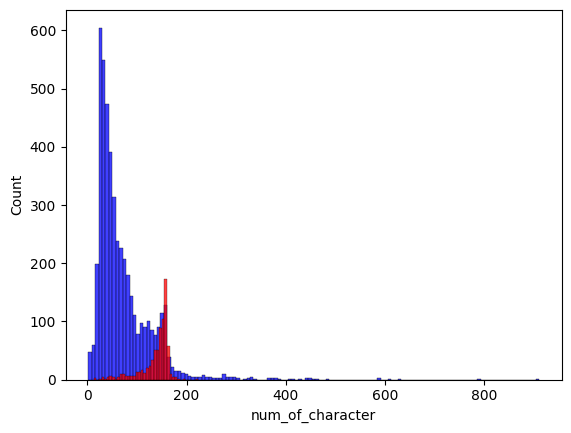

In [160]:
sns.histplot(df[df['Spam'] == 0]['num_of_character'], color='blue')
sns.histplot(df[df['Spam'] == 1]['num_of_character'], color='red')


<Axes: xlabel='num_of_words', ylabel='Count'>

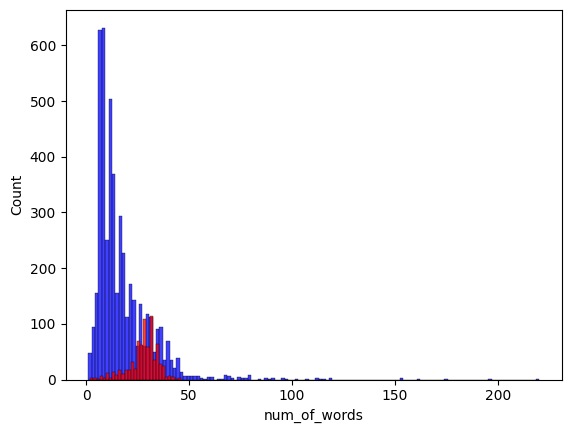

In [161]:
sns.histplot(df[df['Spam'] == 0]['num_of_words'], color='blue')
sns.histplot(df[df['Spam'] == 1]['num_of_words'], color='red')



In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        5572 non-null   int64 
 1   Spam              5572 non-null   int64 
 2   Text              5572 non-null   object
 3   num_of_character  5572 non-null   int64 
 4   num_of_words      5572 non-null   int64 
 5   num_of_sent       5572 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 261.3+ KB


In [163]:
df.head()

,Unnamed: 0,Spam,Text,num_of_character,num_of_words,num_of_sent
0,0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,1,0,Ok lar... Joking wif u oni...,29,8,2
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,3,0,U dun say so early hor... U c already then say...,49,13,1
4,4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [164]:
sample_df = df[['Spam', 'num_of_character', 'num_of_words', 'num_of_sent' ]]
sample_df.head()


,Spam,num_of_character,num_of_words,num_of_sent
0,0,111,24,2
1,0,29,8,2
2,1,155,37,2
3,0,49,13,1
4,0,61,15,1


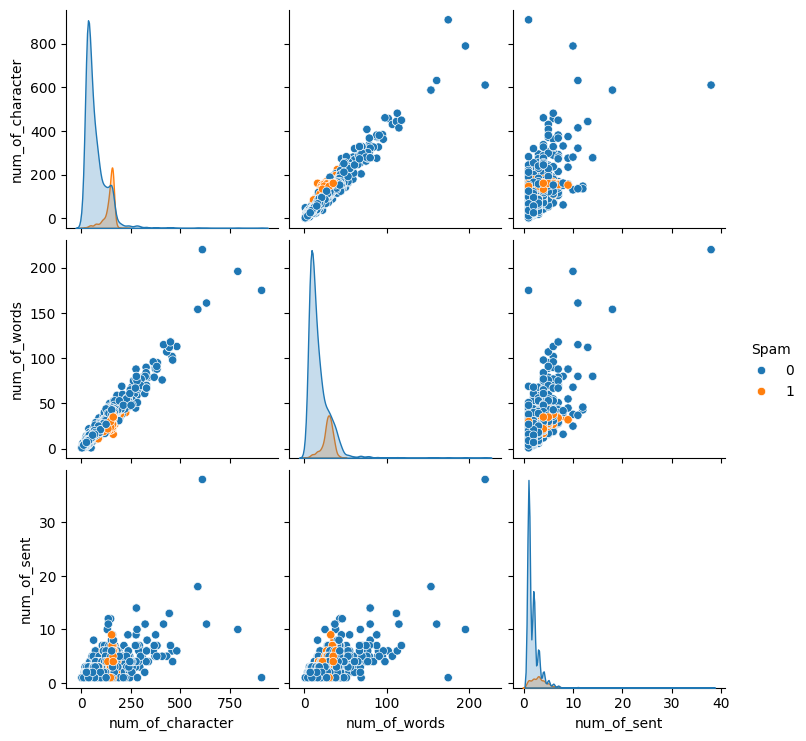

In [165]:
sns.pairplot(sample_df, hue = 'Spam')

<Axes: >

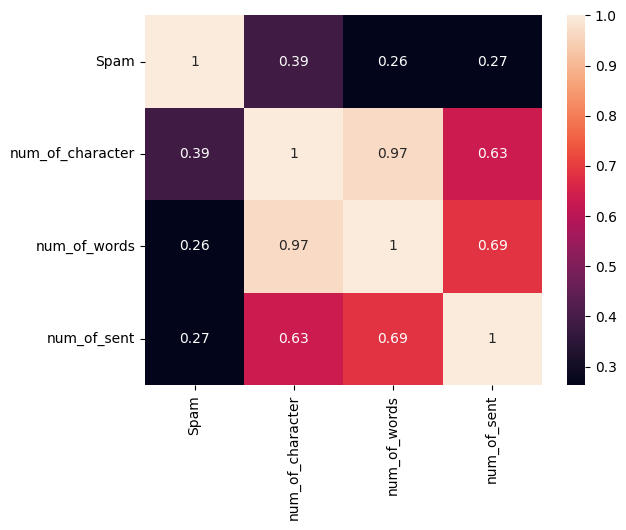

In [166]:
sns.heatmap(sample_df.corr(), annot= True)

# Data Preprocessing
1. Lower case
2. Tokenization
3. Removing Special Characters
4. Removing stop words and Punctuation
5. Stemming

In [167]:
import string
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
s_stemmer = SnowballStemmer(language='english')

In [168]:
# Write a Function which Transform the text into list format -- tokenize that words
# Take Only alpha numeric words and append it in list
def transform_text(text):
    text = text.lower()     
    text = nltk.word_tokenize(text)

    # Remove special character
    lst = []
    for i in text:
        if i.isalnum():
            lst.append(i) 
    text = lst[:]
    lst.clear()

    # Remove Stopwords and Punctuation from the sentece.
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            lst.append(i)

    text = lst[:]
    lst.clear()

    # Stemming of words
    for i in text:
        lst.append(s_stemmer.stem(i))
        
    return " ".join(lst)

### Print word cloud - check word count in spam and ham

In [169]:
df['transformed_text'] = df['Text'].apply(transform_text)


In [170]:
df.head()

,Unnamed: 0,Spam,Text,num_of_character,num_of_words,num_of_sent,transformed_text
0,0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkts 2...
3,3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [171]:
from wordcloud import WordCloud
wc = WordCloud(width=50, height=50, min_font_size=10, background_color='white')

In [172]:
spam_wc = wc.generate(df[df['Spam'] == 1]['transformed_text'].str.cat(sep=' '))

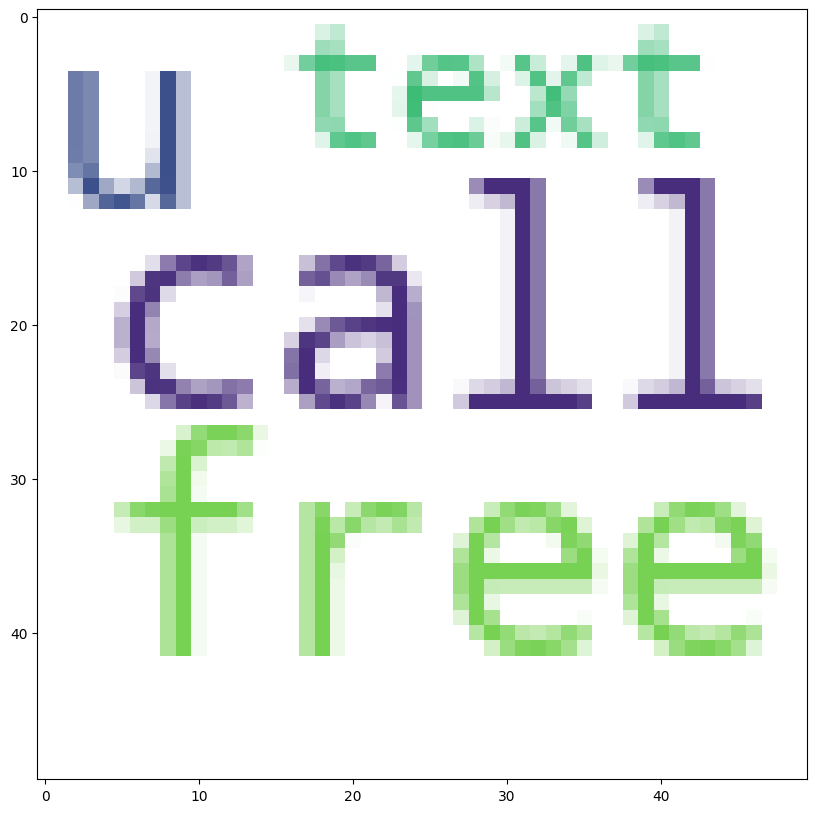

In [173]:
plt.figure(figsize=(20,10))
plt.imshow(spam_wc)

In [174]:
ham_wc = wc.generate(df[df['Spam'] == 0]['transformed_text'].str.cat(sep=' '))

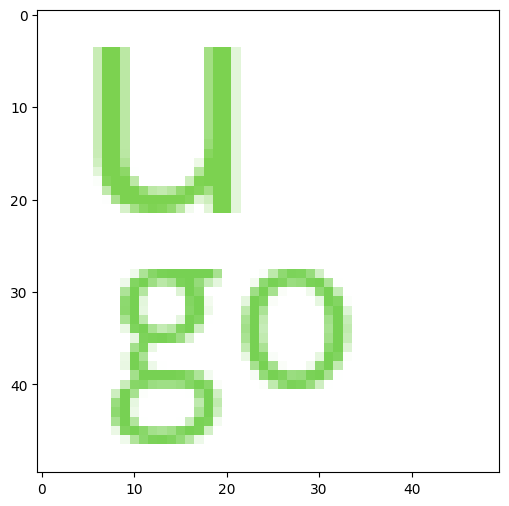

In [175]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [176]:
spam_corpus = []
for msg in df[df['Spam'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [177]:
from collections import Counter

In [178]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,u,979
1,go,417
2,get,357
3,gt,318
4,lt,316
5,2,300
6,come,295
7,call,291
8,know,248
9,ok,245


<Axes: ylabel='1'>

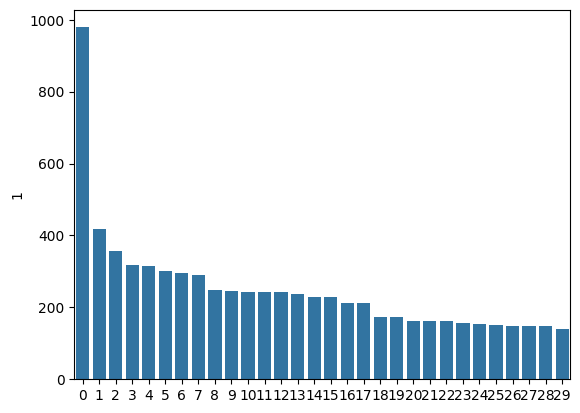

In [179]:
## Most common words
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[1])


In [180]:
ham_corpus = []
for msg in df[df['Spam'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [181]:
print(len(ham_corpus))

38221


In [182]:
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,979
1,go,417
2,get,357
3,gt,318
4,lt,316
5,2,300
6,come,295
7,call,291
8,know,248
9,ok,245


<Axes: ylabel='1'>

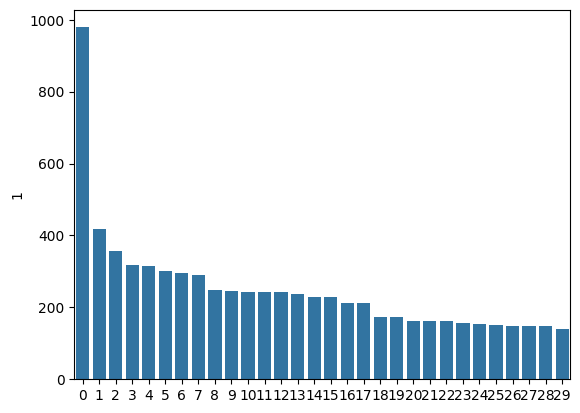

In [183]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[1])

## Model Building

In [184]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [185]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [186]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [187]:
X.shape

(5572, 6701)

In [188]:
y = df['Spam'].values

In [189]:
y.shape

(5572,)

In [190]:
from sklearn.model_selection import train_test_split

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

### Logistic Regression

In [192]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [193]:
model.fit(X, y)

LogisticRegression()

In [194]:
y_pred1 = model.predict(X)


In [216]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
print('Accuracy Score ')
print(accuracy_score(y, y_pred1), '\n')
l_con = confusion_matrix(y, y_pred1)
print("Confusion Matrix")
print(pd.DataFrame(l_con, columns = ["No", "Yes"], index = ["No", "Yes"]), '\n')
print('Precision Score')
print(precision_score(y, y_pred1))

Accuracy Score 
0.9931801866475233 

Confusion Matrix
       No  Yes
No   4825    0
Yes    38  709 

Precision Score
1.0


### Support Vector Machines 

In [196]:
from sklearn.svm import SVC
model2 = SVC(C = 1, kernel='sigmoid', gamma=1.0)

In [197]:
model2.fit(X, y)

SVC(C=1, gamma=1.0, kernel='sigmoid')

In [198]:
train_pred = model2.predict(X)

In [218]:
print('Accuracy Score ')
print(accuracy_score(y, train_pred), '\n')
svm_con = confusion_matrix(y, train_pred)
print("Confusion Matrix")
print(pd.DataFrame(svm_con, columns = ["No", "Yes"], index = ["No", "Yes"]), '\n')
print('Precision Score')
print(precision_score(y,train_pred))

Accuracy Score 
0.9536970567121321 

Confusion Matrix
       No  Yes
No   4734   91
Yes   167  580 

Precision Score
0.8643815201192251


### Random Forest Classifier

In [200]:
from sklearn.ensemble import RandomForestClassifier

In [201]:
clf = RandomForestClassifier(n_estimators=50, random_state=2)

In [202]:
clf.fit(X,y)

RandomForestClassifier(n_estimators=50, random_state=2)

In [203]:
y_train_pred = clf.predict(X)

In [204]:
accuracy_score(y, y_train_pred)

1.0

In [220]:
print('Accuracy Score ')
print(accuracy_score(y, y_train_pred), '\n')
rfc_con = confusion_matrix(y, y_train_pred)
print("Confusion Matrix")
print(pd.DataFrame(rfc_con, columns = ["No", "Yes"], index = ["No", "Yes"]), '\n')
print('Precision Score')
print(precision_score(y, y_train_pred))

Accuracy Score 
1.0 

Confusion Matrix
       No  Yes
No   4825    0
Yes     0  747 

Precision Score
1.0


### Decision Tree Classifier

In [206]:
from sklearn.tree import DecisionTreeClassifier

In [207]:
d_tree = DecisionTreeClassifier(max_depth= 5)
d_tree.fit(X,y)



DecisionTreeClassifier(max_depth=5)

In [208]:
y_predict = d_tree.predict(X)

In [221]:
print('Accuracy Score ')
print(accuracy_score(y, y_predict), '\n')
dtc_con = confusion_matrix(y, y_predict)
print("Confusion Matrix")
print(pd.DataFrame(dtc_con, columns = ["No", "Yes"], index = ["No", "Yes"]), '\n')
print('Precision Score')
print(precision_score(y, y_predict))

Accuracy Score 
0.9301866475233309 

Confusion Matrix
       No  Yes
No   4817    8
Yes   381  366 

Precision Score
0.9786096256684492


#### Got best Result using Random forest Classifier
